In [6]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [7]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

Take 1000 random samples with replacement of increasing sample sizes (e.g. 10, 50, 100, 150, 200, 250, 
300, 500 and 1000 observations), compute the mean Temp_ann of each sample and use an appropriate 
visualization to show how many samples will we need to have a good estimate of the population mean

<AxesSubplot: >

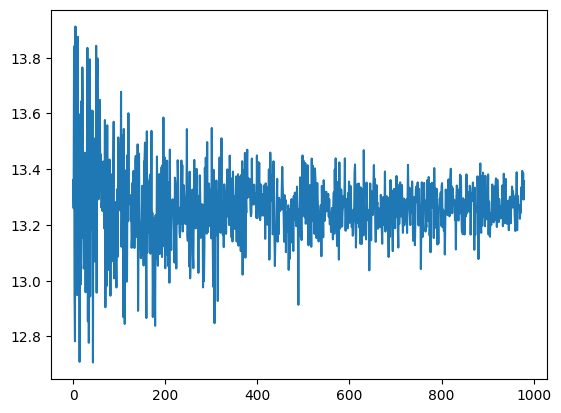

In [8]:
import random

mean = []
for i in range(20,1000,1):
    sample = pd.Series(random.sample(list(df['temp_ann']), i))
    mean.append(sample.mean())

sns.lineplot(mean)

In [9]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

Using an appropriate visualization, check the effect of Mean Annual Temperature (Temp_ann) on the 
presence of Salmo trutta fario (Brown Trout)

In [10]:
ctab = pd.crosstab(df['temp_ann'], df['Salmo trutta fario'])
print(ctab)

Salmo trutta fario  0  1
temp_ann                
3.9                 0  1
4.5                 0  4
4.6                 0  7
4.9                 0  1
5.0                 0  4
...                .. ..
17.9                5  0
18.0                5  0
18.1                2  0
18.2                6  0
18.3                4  0

[130 rows x 2 columns]


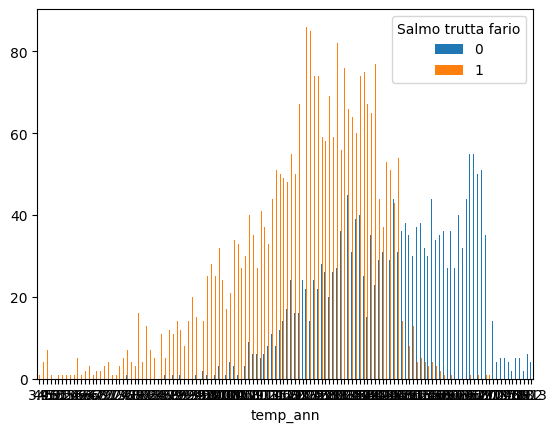

In [11]:
# Creating barplot from crosstable
barplot = ctab.plot.bar(rot=0)

In [12]:
ctab2 = df['Actual_river_slope']
print(ctab2)

0        0.001
1       13.406
2        9.398
3        8.186
4       11.736
         ...  
5006    17.700
5007     0.010
5008     3.059
5009    62.100
5010    17.800
Name: Actual_river_slope, Length: 5011, dtype: float64


Test, using both visualization and hypothesis testing methods, if the actual_river_slope is drawn from a 
normal distribution.

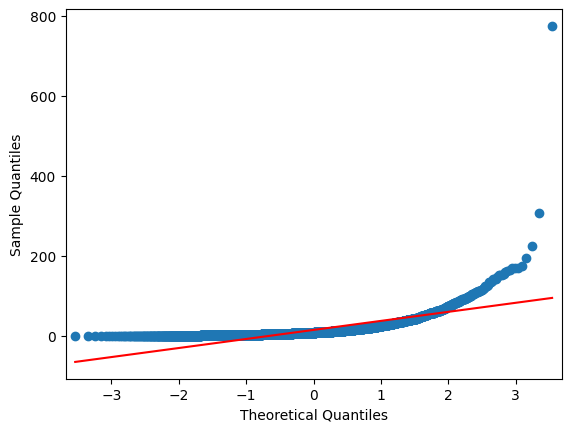

In [15]:
# QQ Plot
#from numpy.random import seed
#from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

data = ctab2.dropna()
# q-q plot
qqplot(data, line='s')
pyplot.show()

In [16]:
# import function
from scipy.stats import shapiro

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.516, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


Take 100 samples of 2000 observations with replacement, compute the mean for each sample and plot 
the resulting histogram of means. Test if these 100 mean values are drawn from a normal distribution

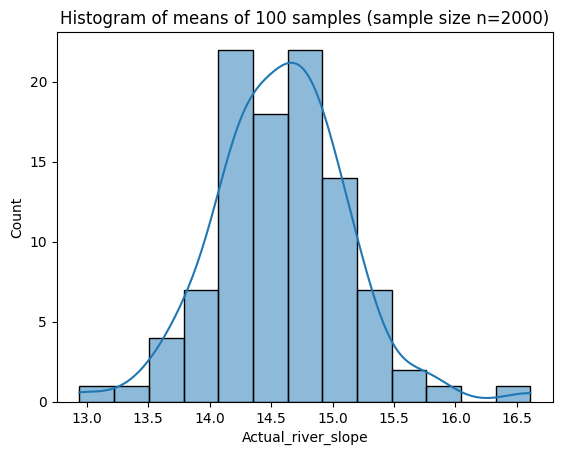

Statistics=0.976, p=0.068
Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)


In [20]:
mean2 =[]

for i in range(100):
    sample = data.sample(2000, replace = True)
    mean2.append(round(sample.mean(),2))

sns.histplot(mean2,kde=True).set(xlabel='Actual_river_slope', title='Histogram of means of 100 samples (sample size n=2000)')
plt.show()
stat, p = shapiro(mean2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha: print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else: print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')